# Activity: Visualization with Matplotlib and Seaborn

**Initial Due Date: 2026-01-08 10:00AM**  
**Final Due Date: 2026-01-12 4:15PM**

In [1]:
# Set global constants for notebook (you should not need to modify these values)
SITE_URL = "https://middcs.github.io/csci-1010-w26"

## Learning Objectives

By the end of this notebook, you will be able to:

1.  Generate annotated visualizations using Matplotlib and Seaborn
2.  Use additional features of Matplotlib and Seaborn APIs (e.g.,
    figure-level vs axes-level functions)
3.  Create publication-quality figures for multivariate data

> #### 🤔 What does “publication-quality” mean?
>
> That is one of those vague terms that is often used but poorly
> defined. It generally means figures suitable for peer-reviewed
> scientific publication. In this context, we mean figures that
> effectively communicate the intended message, are visually appealing,
> apply good visualization practices and meet the technical expectations
> for publication. Individuals authors can have *very* specific
> preferences for the tools they use and the resulting aesthetics (your
> instructors are happy to discuss their preferences at great, great,
> great length 😅).

## Introduction

Get started with the necessary imports:

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Part A: Annotating visualizations with regression lines

Let’s load and plot a common demonstration dataset,
[“tips”](https://rdrr.io/cran/reshape2/man/tips.html), which contains
information about restaurant bills recorded by a single server over
several months in the early 1990s.

In [3]:
tips = sns.load_dataset("tips")

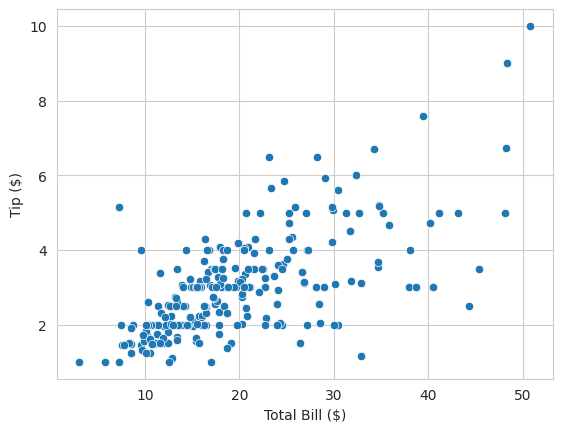

In [4]:
ax = sns.scatterplot(tips, x="total_bill", y="tip")
ax.set_xlabel("Total Bill ($)")
ax.set_ylabel("Tip ($)")
plt.show()

As we might hypothesize based on cultural practices there is a positive,
approximately linear, relationship between the bill and tip amounts. To
better illustrate this relationship we want to add a regression line
(line of best fit) to the scatter plot and fixed line showing common
cultural tipping practices (tipping 15% of the bill).

For context, Seaborn has both [“axes-level” functions and “figure-level”
functions](https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions).
The former plot onto a single `Axes` object (which may be part of a
larger figure), while the latter create their own figure. Figure-level
functions offer a higher-level interface with more built-in
functionality (but perhaps less flexibility). The [`lmplot`
function](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)
is the figure-level function for plotting data with regression line(s)
(`regplot` is the axes-level function).

When reviewing the documentation for Seaborn plotting functions, make
sure to scroll down to review the the examples. That section can be very
helpful for figuring out the arguments you need to achieve your desired
visualization (e.g., with a regression line, etc.).

> #### ❓ Where does the regression line come from?
>
> We will learn more about regression (and models in general) later in
> the course, for now we will treat it is a “black box” that fits a line
> to data. While Seaborn makes it easy to add such a line, it makes it
> tricky to extract the underlying model parameters. For that, stay
> tuned for future classes.

### Exercise A1

Create a scatter plot of `tip` vs `total_bill` using `sns.lmplot` to add
a regression line. Since `lmplot` is a figure-level function, it returns
a [`FacetGrid`
object](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn-facetgrid),
which may contain one or more `Axes` objects. The `FacetGrid` object
exposes similar methods for setting labels, etc., including the `set`
method we saw in the notes. Since there is a single axes in the figure
we can also use Matplotlib’s `plt` interface to customize the plot. You
can access the underling axis like this: `fg.ax.set_xlabel(...)`, or you
can call `fg.set(...)` to set multiple attributes at once.

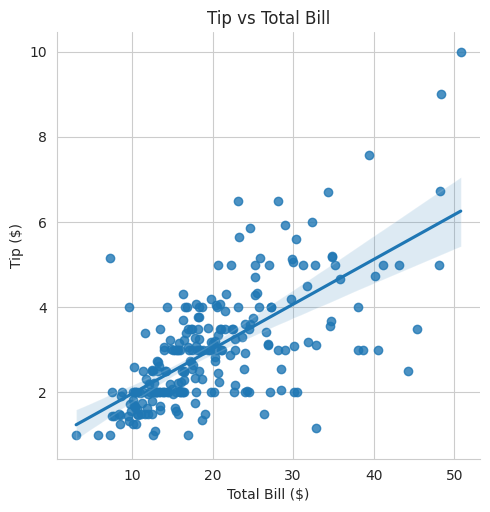

In [5]:
fg = sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip"
)

fg.set(xlabel="Total Bill ($)", ylabel="Tip ($)")
fg.ax.set_title("Tip vs Total Bill")


plt.show()

### Exercise A2

To provide context for interpreting the regression line, generate the
same plot but add a line showing a 15% tip with accompanying legend. You
can use Matplotlib’s [`plt.axline`
function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html#matplotlib.pyplot.axline)
to add the fixed line. Since there is a single axes, we don’t need to
specify which axes to use. To facilitate creating a legend, you can
provide a `label` argument to `plt.axline`, that will then be used as
the text in the legend. For visual effect, you may also wish to modify
the color of the 15% line, make it dashed, etc.

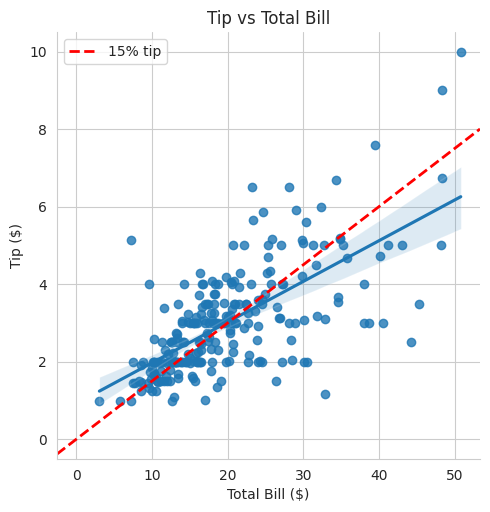

In [6]:
fg = sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip"
)

fg.set(xlabel="Total Bill ($)", ylabel="Tip ($)")
fg.ax.set_title("Tip vs Total Bill")

plt.axline((0, 0), slope=0.15, linestyle="--", linewidth=2, label="15% tip", color = "red")
plt.legend()
plt.show()

## Part B: Creating publication-quality figures for multivariate data

The following loads de-identified survey data about graduate students
interest in sequencing their own genome as part of a course on personal
genome analysis\[@lindermanImpacts2018\]. Our goal here is to
effectively recreate [Figure
1](https://link.springer.com/article/10.1186/s12920-018-0319-0/figures/1)
from that paper using Matplotlib and Seaborn (without the test
annotations).

The “subject” column uniquely identifies each student, “Year” indicates
the year of the course, “Eligible” indicates whether the student was
eligible to receive free genome sequencing (not all were), and
“Timepoint” indicates whether the data is from time point T1, before a
required introductory workshop that was part of the informed
decision-making procedure, or T2, after the workshop. For context,
students made the decision to sequence their genome after the workshop,
i.e., after T2. The “Interest” column contains their interest in
sequencing their own genome on a 1-5 Likert scale, where 1 is “No
definitely not” and 5 is “Yes definitely”. For eligible students who
could make a decision about sequencing, “DCSTotal” reports their score
on the Decisional Conflict Scale (DCS), a validated measure of
uncertainty in decision-making. DCS scores range from 0 to 100, with
lower scores indicating less conflict/uncertainty (a cutoff of \<25 is
associated with making a decision, while \>37.5 is associated with
feeling uncertain about a decision)\[@oconnorDCS1995\].

Since “Interest” is a discrete ordered variable (“Yes definitely” is
more interested than “Yes probably”), we will convert it to a
categorical variable with an explicit ordering. For analysis, we will
maintain a mapping to numeric values.

In [7]:
# SITE_URL is an automatic variable set for you to point to the root of the course site
url = f"{SITE_URL}/data/interest.csv"
interest_mapping = {
    "No definitely not": 1,
    "No probably not": 2,
    "Don't know": 3,
    "Yes probably": 4,
    "Yes definitely": 5
}

interest = pd.read_csv(url, dtype={'Interest': pd.api.types.CategoricalDtype(categories=interest_mapping.keys(), ordered=True)})
interest.head()

,subject,Year,Eligible,Timepoint,Interest,DCSTotal
0,2013:1,2013,False,T1,Don't know,NaN
1,2013:1,2013,False,T2,Yes definitely,NaN
2,2013:10,2013,True,T1,Yes definitely,16.666667
3,2013:10,2013,True,T2,Yes definitely,23.333333
4,2013:11,2013,True,T1,Yes probably,28.333333


### Exercise B1

Briefly describe whether this data is “tidy” according to the principles
we discussed in class. A satisfactory answer will describe what
constitutes an observation in this context.

*This dataset is tidy. Each column represents a single variable (subject, year, etc), each row represents a single observation, and each cell contains a single value. Here, an observation is a measurement of one student at either time T1 or T2. Becuase these individuals are being measured at two points in time, subjects appear in 2 rows, but each row captures a distinct observation.*

### Exercise B2

Briefly describ what “messages” the authors are trying to communicate
with panel A of [Figure
1](https://link.springer.com/article/10.1186/s12920-018-0319-0/figures/1)
in the paper, and how those goals are reflected in their design choices
(e.g., attribute mappings, plot types, etc.).

*Panel A is trying to communicate that students interest in sequencing their own genome is actually high before the workshop even starts. The change to post-workshop time T2 doesn't have a significant change from time T1. There is small shift, but it doesn't appear to be significant. One notable trend in Panel A is the relatively large increase in interest from T1 to T2 among the non-eligible group in one course year, but it's not representative of the overall pattern. The design places timepoint on the x-axis to emphasize before–after comparison, using an ordered y-axis, and connects group means with lines to highlight within-group change. Color is used to distinguish eligible from non-eligible students, while boxplot bars show uncertainty around the means.*

### Exercise B3

To facilitate computing summary statistics, create a numeric column
“InterestMetric” for “Interest” using the mapping provided above. Note
that depending on your approach, the mapping can produce categorical
values that will need to be converted to numeric values. Recalling our
previous activities, your approach should be “vectorized”, i.e., should
not use an explicit loop.

In [8]:
interest["InterestMetric"] = interest["Interest"].map(interest_mapping).astype("float")
interest

,subject,Year,Eligible,Timepoint,Interest,DCSTotal,InterestMetric
0,2013:1,2013,False,T1,Don't know,NaN,3.0
1,2013:1,2013,False,T2,Yes definitely,NaN,5.0
2,2013:10,2013,True,T1,Yes definitely,16.666667,5.0
3,2013:10,2013,True,T2,Yes definitely,23.333333,5.0
4,2013:11,2013,True,T1,Yes probably,28.333333,4.0
...,...,...,...,...,...,...,...
186,2015:7,2015,True,T2,Yes probably,20.000000,4.0
187,2015:8,2015,True,T1,Yes probably,25.000000,4.0
188,2015:8,2015,True,T2,Yes probably,25.000000,4.0
189,2015:9,2015,True,T1,Don't know,35.000000,3.0


### Exercise B4

Recreate the two-panel figure linked above using Matplotlib and Seaborn.
Each panel should show the mean and 95% confidence interval for each
combination of “Year”, “Eligible”, and “Timepoint”. Use the same
attribute mapping as the original figure (the colors themselves won’t
match, we will use Seaborn’s default color palette instead). The DCS
panel should include lines for the relevant cutoffs. Your figure *does
not* need to have horizontal jitter like the original (see below). Make
sure you are using good visualization practices such as showing the full
range of the data (1-5 for interest, 0-100 for DCS), labeling axes, and
including a single legend. Your figure should be fully generated with a
single notebook cell (i.e., you should not assume any subsequent manual
editing, such as moving the legend).

Some suggestions:

-   Recall we can use Matplotlib to create figures with multiple
    subplots (axes), and then pass those axes to Seaborn axes-level
    plotting functions using the `ax` argument.
-   Investigate `sns.lineplot`, including its options for summary
    statistics and error bars. You should not need to perform any manual
    aggregation of the data!
-   Think about which columns in the data are mapped to which visual
    attributes in the plot. (e.g., hue and \[line and marker\] style),
    then set the corresponding attribute arguments for the Seaborn
    function.

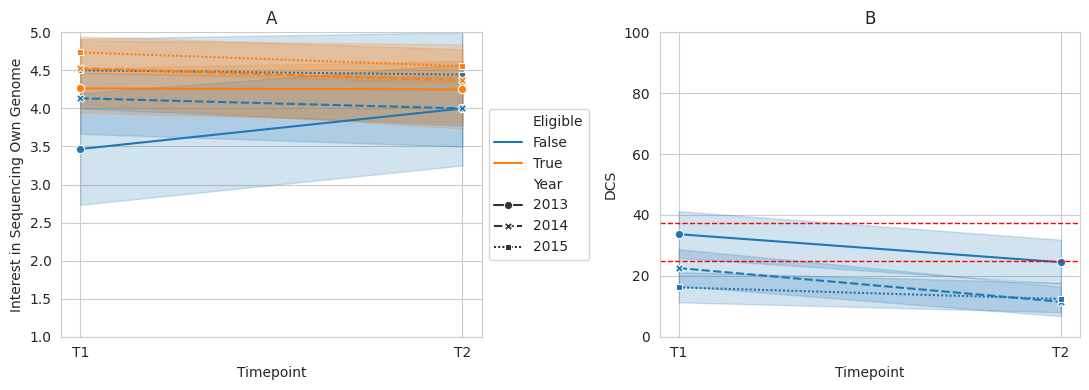

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4), sharex=True)

# Panel A
sns.lineplot(
    data=interest,
    x="Timepoint",
    y="InterestMetric",
    style="Year",
    hue="Eligible",
    dashes=True,
    markers=True,
    estimator="mean",
    errorbar=("ci", 95),
    ax=ax1
)
ax1.set_title("A")
ax1.set_xlabel("Timepoint")
ax1.set_ylabel("Interest in Sequencing Own Genome")
ax1.set_ylim(1, 5)

# Panel B
dcs = interest.dropna(subset=["DCSTotal"])

sns.lineplot(
    data=dcs,
    x="Timepoint",
    y="DCSTotal",
    hue="Eligible",
    style="Year",
    markers=True,
    dashes=True,
    estimator="mean",
    errorbar=("ci", 95),
    ax=ax2
)
ax2.set_title("B")
ax2.set_xlabel("Timepoint")
ax2.set_ylabel("DCS")
ax2.set_ylim(0, 100)

# cutoff lines
ax2.axhline(25, linestyle="--", linewidth=1, color = "red")
ax2.axhline(37.5, linestyle="--", linewidth=1, color = "red")

ax2.legend_.remove()
ax1.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Exercise B5 (optional)

As an optional challenge, design an alternative visualization for this
data. Think about you could better communicate the authors’ message. You
might consider using different plot types, different attribute mappings,
etc. We will discuss the plots in class and the best visualizations will
receive a prize!

### For future reference

One of the challenges of a categorical axis like we have here is that
points can overlap making them difficult to distinguish. One approach,
like in the original plot is to add jitter or otherwise offsets the
points (typically called “dodging”) to the categorical axis. Seaborn’s
original API does not support “dodging” on line plots, but Seaborn’s new
[seaborn.objects API](https://seaborn.pydata.org/objects/index.html)
does offers this capability. That API is beyond the scope of this
course, but the solution will include an example for how to do so with
Seaborn objects.

In [10]:
import seaborn.objects as so
# TODO: Your code here

## Collaboration statement

In a markdown cell below, briefly list who or what you collaborated with
and how. Cite any sources here or with relevant inline comments in your
code. Acknowledge all contributors, both people and AI, and what
portions of this notebook they contributed. You do not need to cite or
acknowledge any material provided in the starter file(s).

*For help on the last question I used the Seaborn lineplot documentation @ https://seaborn.pydata.org/generated/seaborn.lineplot.html.*

## Submitting your notebook

You will simultaneously submit the following two files to the relevant
assignment on [Gradescope](https://gradescope.com) via the “Upload
option” (guide
[here](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)).
**Both files must be uploaded at the same time and the file names must
match the specification exactly for the autotesting to run
successfully.**

1.  `activity_python_visualization.ipynb`: Your completed IPython
    notebook. You can obtain this via the “File→Download→Download
    .ipynb” menu option in Colab.
2.  `activity_python_visualization.py`: Your completed IPython notebook
    as a Python file. You can obtain this via the
    “File→Download→Download .py” menu option in Colab. This file is used
    to provide line-level feedback on your submission.

You can submit multiple times, with only the most recent submission
(before the final due date) assessed for credit. Gradescope will run a
series of automated unit tests on your notebook (which may takes 10s of
seconds depending on the complexity of the notebook). Note that the
tests performed by Gradescope are limited. Passing all of the visible
tests does not guarantee that your submission correctly satisfies all of
the requirements of the assignment.